<a href="https://colab.research.google.com/github/roobyyi/Data-Scientist-Practicum-Project/blob/main/Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEGALINE TELECOMMUNICATION <a id='intro'></a>

Tugas ini merupakan lanjutan tugas dari projek 4, pada projek 4 telah di analisa terkait pelanggan yang menggunakan paket di perusahaan telekomunikasi Megaline.

Pada tugas lanjutan ini, yang akan dikerjakan adalah pembuatan model machine learning dengan tujuan untuk merekomendasikan paket baru terhadap pelanggan. Pelanggan nantinya akan dimasukkan kedalam kualifikasi cocok dengan paket smart atau ultra. Dari pembuatan machine learning ini, langkah selanjutnya yang bisa diambil adalah merekomendasikan paket yang cocok dengan pelanggan ketika paket yang digunakan sekarang berbeda dengan paket yang diidentifikasi oleh machine learning.

Namun, untuk projek kali ini, yang ditekankan adalah pemodelan machine learning untuk identifikasi paket yang digunakan oleh pelanggan.

<h1>Daftar Isi<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Library-dan-Pengecekan-Data-" data-toc-modified-id="Import-Library-dan-Pengecekan-Data--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Library dan Pengecekan Data <a id="import"></a></a></span><ul class="toc-item"><li><span><a href="#Import-Library-" data-toc-modified-id="Import-Library--1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Library <a id="library"></a></a></span></li><li><span><a href="#Pengecekan-Data-" data-toc-modified-id="Pengecekan-Data--1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pengecekan Data <a id="check_data"></a></a></span></li></ul></li><li><span><a href="#Pemisahan-Data-" data-toc-modified-id="Pemisahan-Data--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pemisahan Data <a id="split_data"></a></a></span></li><li><span><a href="#Pemodelan-Machine-Learning-" data-toc-modified-id="Pemodelan-Machine-Learning--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pemodelan Machine Learning <a id="model"></a></a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-" data-toc-modified-id="Logistic-Regression--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression <a id="lr"></a></a></span></li><li><span><a href="#Decision-Tree-" data-toc-modified-id="Decision-Tree--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree <a id="dt"></a></a></span></li><li><span><a href="#Random-Forest-" data-toc-modified-id="Random-Forest--3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random Forest <a id="rf"></a></a></span></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Pengujian-Test-Dataset" data-toc-modified-id="Pengujian-Test-Dataset-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Pengujian Test Dataset</a></span></li></ul></li><li><span><a href="#Kesimpulan-" data-toc-modified-id="Kesimpulan--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kesimpulan <a id="kesimpulan"></a></a></span></li></ul></div>

## Import Library dan Pengecekan Data <a id='import'></a>

### Import Library <a id='library'></a>

Bagian ini adalah bagian import library apa saja yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def confusion_score_valid(model):
    print(f'Akurasi yang didapatkan adalah {accuracy_score(target_valid, model.predict(features_valid))}')
    print(f'Presisi yang didapatkan adalah {precision_score(target_valid, model.predict(features_valid))}')
    print(f'Recall yang didapatkan adalah {recall_score(target_valid, model.predict(features_valid))}')
    print(f'Nilai F1 yang didapatkan adalah {f1_score(target_valid, model.predict(features_valid))}')

### Pengecekan Data <a id='check_data'></a>

Karena machine learning tidak bisa memproses nilai yang hilang, maka data dicek kembali untuk memastikan tidak ada data yang hilang.

In [3]:
user_data = pd.read_csv('/content/users_behavior.csv')

In [4]:
user_data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [5]:
user_data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Sip, data sudah bersih

## Pemisahan Data <a id='split_data'></a>

Setelah data dicek dan tidak ada yang bermasalah, maka selanjutnya adalah pemisahan data. Hal ini dilakukan karena data set yang diberikan hanya 1 dataset. Dari 1 dataset tersebut akan dibagi menjadi 3 bagian, yaitu 
1. Train dataset yaitu untuk training model. 
2. Validation dataset yaitu untuk validasi model apakah berjalan dengan lancar, dan disini dilakukan juga yang namanya tuning untuk mendapatkan model yang final 
3. Test dataset yaitu untuk pengujian model dan mendapatkan keakuratan dari model. 

Rasio pemisahan yang akan dilakukan adalah 75% untuk Train dataset, 15% untuk Validation dataset, dan 10% untuk Test dataset. Untuk melakukan pemisahan ini, digunakan train_test_split dua kali. Pertama dengan size 0.75, dan yang kedua adalah dengan size 0.6.

In [6]:
features = user_data.drop(['is_ultra'], axis=1)
target = user_data['is_ultra']

In [7]:
features_train, features_sisa, target_train, target_sisa = train_test_split(features, target, train_size = 0.75, random_state = 1616)
features_valid, features_test, target_valid, target_test = train_test_split(features_sisa, target_sisa, train_size = 0.6, random_state =1111)

In [8]:
print(f'Size train dataset adalah {round(len(features_train)/len(features)*100)}%')
print(f'Size validation dataset adalah {round(len(features_valid)/len(features)*100)}%')
print(f'Size test dataset adalah {round(len(features_test)/len(features)*100)}%')

Size train dataset adalah 75%
Size validation dataset adalah 15%
Size test dataset adalah 10%


Data sudah dipisah.

## Pemodelan Machine Learning <a id='model'></a>

Pemodelan machine learning untuk menemukan yang akan digunakan ada 3, dari ketiga pemodelan tersebut akan dicari yang paling baik accuracy scorenya dengan tambahan dilakukan tuning untuk Decision Tree dan Random Forest.
1. Logistic Regression
2. Decision Tree (dengan tuning max_depth)
3. Random Forest (dengan tuning max_depth dan n_estimators)

Pemodelan yang dicari adalah pemodelan dengan akurasi minimal 75%.

### Logistic Regression <a id='lr'></a>

Untuk pemodelan ini hyperparameter yang digunakan hanya random_state, hyperparameter ini digunakan untuk mendapatkan hasil yang konsisten. Meskipun sebenarnya ada hyperparameter yang bisa dituning yaitu solvernya. Namun untuk kali ini tidak digunakan karena pengubahan solver sangat bergantung dengan karakteristik datasetnya. Seperti misalnya untuk dataset yang kecil lebih baik digunakan liblinear, namun untuk dataset yang besar, 'sag' dan 'saga' menjadi pilihan yang lebih baik karena lebih cepat.

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [9]:
model_lr = LogisticRegression(random_state = 1212)
model_lr.fit(features_train, target_train)
valid_lr = model_lr.predict(features_valid)
test_lr = model_lr.predict(features_test)

print(f'Akurasi untuk validation adalah {accuracy_score(target_valid, valid_lr)*100} %')
print(f'Akurasi untuk tes adalah {accuracy_score(target_test, test_lr)*100} %')


Akurasi untuk validation adalah 70.12448132780082 %
Akurasi untuk tes adalah 72.98136645962732 %


Akurasi yang didapatkan masih dibawah 75% sehingga pemodelan menggunakan Logistic Regression tidak cocok digunakan.

Sebelum melanjutkan ke pemodelan yang selanjutnya, ditelaah dulu confusion matrixnya.

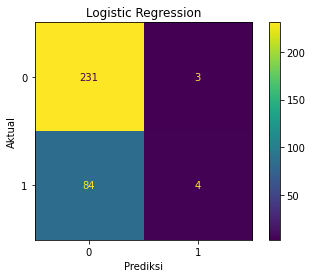

In [10]:
cm_lr = confusion_matrix(target_test, test_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.title('Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [11]:
confusion_score_valid(model_lr)

Akurasi yang didapatkan adalah 0.7012448132780082
Presisi yang didapatkan adalah 0.6470588235294118
Recall yang didapatkan adalah 0.0738255033557047
Nilai F1 yang didapatkan adalah 0.13253012048192772


### Decision Tree <a id='dt'></a>

Untuk pemodelan dengan menggunakan decision tree, hyperparameter yang digunakan selain random_state adalah max_depth. Max depth adalah seberapa dalam "if-else" yang digunakan dalam pemodelan. Untuk itu max_depth akan dituning dengan range 1 sampai 5 untuk didapatkan nilai terbaiknya. Karena jika terlalu banyak, bisa terjadi overfitting. Dari referensi yang saya baca, nilai max_depth yang paling ideal adalah 5.

Ref : https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09

In [12]:
best_dt_depth = 0
best_dt_accuracy = 0
best_dt_model = None
for depth in range(1,6):
    model_dt = DecisionTreeClassifier(random_state=1212, max_depth=depth)
    model_dt.fit(features_train,target_train)
    prediction_dt_valid = model_dt.predict(features_valid)
    akurasi = accuracy_score(target_valid, prediction_dt_valid)
    if akurasi > best_dt_accuracy:
        best_dt_depth = depth
        best_dt_accuracy = akurasi
        best_dt_model = model_dt
print(f'Max_depth terbaik adalah {best_dt_depth} dengan akurasi dataset test adalah {accuracy_score(target_valid, best_dt_model.predict(features_valid))*100} %.')        
    

Max_depth terbaik adalah 3 dengan akurasi dataset test adalah 79.04564315352697 %.


Akurasi dari model ini sudah diatas 75% sehingga model ini (untuk sekarang) bisa digunakan dengan baik.

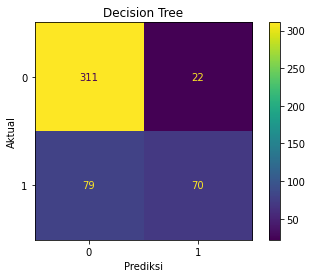

In [13]:
cm_dt = confusion_matrix(target_valid, best_dt_model.predict(features_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
plt.title('Decision Tree')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [14]:
confusion_score_valid(best_dt_model)

Akurasi yang didapatkan adalah 0.7904564315352697
Presisi yang didapatkan adalah 0.7608695652173914
Recall yang didapatkan adalah 0.4697986577181208
Nilai F1 yang didapatkan adalah 0.5809128630705395


### Random Forest <a id='rf'></a>

Untuk pemodelan dengan menggunakan Random Forest, hyperparameter yang digunakan selain random_state adalah max_depth dengan n_estimators, sama dengan di decision tree, max_depth pada random forest pun berarti seberapa dalam if-else yang digunakan. Untuk n_estimators sendiri, adalah ... Jika dianalogikan sebagai pohon, pada decision tree, pohon yang digunakan hanya 1 dan max_depth adalah bentuk dari cabang cabangnya. Namun dalam Random Forest, seperti pada namanya yaitu "Forest" kumpulan dari pohon pohon, n_estimators adalah jumlah pohon yang digunakan. 

n_estimator yang digunakan adalah 10 hingga 50 (per sepuluh) dan depth yang digunakan hingga 7.

Ref untuk depth: https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1

In [15]:
best_rf_model = None
best_rf_accuracy = 0
best_est = 0
best_rf_depth = 0
for est in range(25, 201, 25):
    for depth in range (1, 8):
        model_rf = RandomForestClassifier(max_depth = depth, n_estimators=est, random_state=12345)
        model_rf.fit(features_train, target_train)
        predictions_rf_valid = model_rf.predict(features_valid)
        akurasi = accuracy_score(target_valid, predictions_rf_valid)
        if akurasi > best_rf_accuracy:
            best_rf_model = model_rf
            best_rf_accuracy = akurasi
            best_est = est
            best_rf_depth = depth
print(f'Max depth terbaik adalah {best_rf_depth}, dengan n_estimator sebanyak {best_est}, dan akurasi dataset test adalah {accuracy_score(target_valid, best_rf_model.predict(features_valid))*100} %.')            

Max depth terbaik adalah 6, dengan n_estimator sebanyak 75, dan akurasi dataset test adalah 81.53526970954357 %.


Akurasi dari model ini sudah diatas 75% dan juga melebihi model dari Decision Tree.

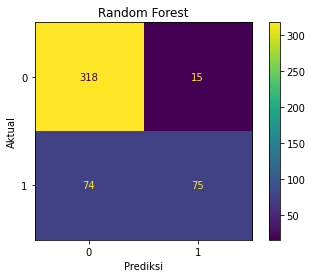

In [16]:
cm_rf = confusion_matrix(target_valid, best_rf_model.predict(features_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title('Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [17]:
confusion_score_valid(best_rf_model)

Akurasi yang didapatkan adalah 0.8153526970954357
Presisi yang didapatkan adalah 0.8333333333333334
Recall yang didapatkan adalah 0.5033557046979866
Nilai F1 yang didapatkan adalah 0.6276150627615062


### Baseline

Setelah menguji ketiga pemodelan machine learning, didapatkan bahwa akurasi dari Random Forest adalah yang terbaik. Untuk tujuan pengembangan lanjutan, dibutuhkan baseline model untuk mengukur seberapa pengaruh machine learning yang telah dibuat terhadap prediksi yang dibuat. Baseline model yang digunakan adalah DummyClassifier, DummyClassifier merupakan sebuah pemodelan yang benar benar tidak mencari pola tentang dataset, jadi bisa digunakan untuk membandingkan pemodelan yang mencari pola dengan yang tidak mencari pola.

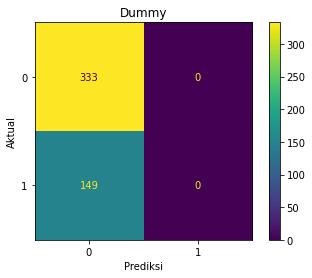

In [18]:
baseline_dummy = DummyClassifier(random_state = 1212)
baseline_dummy.fit(features_train, target_train)
target_dummy_predict = baseline_dummy.predict(features_valid)
cm_dm = confusion_matrix(target_valid, baseline_dummy.predict(features_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dm)
disp.plot()
plt.title('Dummy')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [19]:
confusion_score_valid(baseline_dummy)

Akurasi yang didapatkan adalah 0.6908713692946058
Presisi yang didapatkan adalah 0.0
Recall yang didapatkan adalah 0.0
Nilai F1 yang didapatkan adalah 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Seperti yang terlihat diatas, bahwa baseline model yang dibuat selalu memprediksi 0 untuk semua data tes. Memang untuk akurasi nya bisa mencapai 69% namun untuk metric lainnya bisa mencapai 0!. Jadi untuk melihat kualitas model, jangan hanya melihat dari satu metric saja. Karena bisa saja untuk metric tersebut bagus namun untuk metric lainnya sangat jelek. Seperti pada baseline ini yang tidak bisa memprediksi paket Ultra dan hanya memprediksi paket bukan Ultra.

Jadi memang untuk pemodelan dengan Random Forest menghasilkan nilai yang lebih baik karena bukan hanya bisa memprediksi yang "bukan" paket Ultra (Meskipun kalah oleh model baseline yang bisa memprediksi semua paket yang bukan Ultra), namun juga bisa memprediksi yang menggunakan paket Ultra yang mana tidak bisa diprediksi oleh model baseline.

### Pengujian Test Dataset

Setelah pengujian model dan juga dilakukan komparasi terhadap baseline model, Random Forest Classifier dipilih menjadi model yang akan digunakan. Dengan hyperparameter max_depth 6, dan n_estimator 75.

In [20]:
best_rf_model

RandomForestClassifier(max_depth=6, n_estimators=75, random_state=12345)

Model sudah didalam variabel.

In [21]:
best_rf_model.fit(features_train, target_train)
predictions_rf_test = model_rf.predict(features_test)
akurasi = accuracy_score(target_test, predictions_rf_test)
presisi = precision_score(target_test, predictions_rf_test)
recall = recall_score(target_test, predictions_rf_test)
nilai_f1 = f1_score(target_test, predictions_rf_test)

In [22]:
print('Dari pemodelan yang digunakan, Random Forest yang dipilih menjadi yang terbaik, dengan detail sebagai berikut:')
print(f'Akurasi yang didapatkan adalah {akurasi}')
print(f'Presisi yang didapatkan adalah {presisi}')
print(f'Recall yang didapatkan adalah {recall}')
print(f'Nilai F1 yang didapatkan adalah {nilai_f1}')

Dari pemodelan yang digunakan, Random Forest yang dipilih menjadi yang terbaik, dengan detail sebagai berikut:
Akurasi yang didapatkan adalah 0.8136645962732919
Presisi yang didapatkan adalah 0.7692307692307693
Recall yang didapatkan adalah 0.45454545454545453
Nilai F1 yang didapatkan adalah 0.5714285714285714


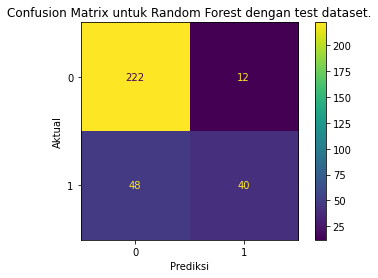

In [23]:
cm_best_rf = confusion_matrix(target_test, predictions_rf_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf)
disp.plot()
plt.title('Confusion Matrix untuk Random Forest dengan test dataset.')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Jika dibandingkan dengan ketika menggunakan dataset validation, nilai yang didapatpun tidak terlalu buruk karena hanya berbeda 2-5% saja dengan skor yang menggunakan dataset test.

## Kesimpulan <a id='kesimpulan'></a>

Kesimpulan yang bisa didapatkan dari proyek kali ini adalah

1. Logistic Regression tidak bekerja dengan baik. Akurasi yang didapatkan belum diatas 75%.
2. Decision Tree dan Random Forest memiliki Akurasi diatas 75%, dan random forest memiliki akurasi yang terbesar dengan max_depth 6 dengan n_estimator 75.
3. Karena sebenarnya machine learning ini akan digunakan untuk merekomendasikan paket, maka nantinya machine learning ini digunakan dibulan ke 2 atau seterusnya. Misalnya, ketika pelanggan menggunakan paket smart di Bulan Januari, dan diprediksi sama menggunakan paket smart, lalu ketika di Bulan Februari pelanggan masih menggunakan paket smart namun diprediksi sudah menggunakan paket ultra (karena features nya sudah masuk klasifikasi paket ultra), pelanggan akan diberi rekomendasi untuk berpindah paket ke paket ultra, begitu pun sebaliknya untuk paket ultra yang direkomendasikan menjadi paket smart.
4. Untuk metric lainnya seperti presisi, recall, dan nilai F1, untuk dataset ini memang belum terlalu dibutuhkan. Hal ini karena ketiga metric ini memiliki kegunaan masing masing, seperti presisi yang tinggi digunakan untuk pemodelan yang False Negativenya  berbahaya (Misalnya sakit yang menular, ketika diprediksi negative tapi sebenarnya sakit), recall untuk pemodelan yang False positivenya yang berbahaya (Misalnya ada email yang sebenarnya penting (actual positif bukan spam) namun dianggap spam(predicted negatif), dan bisa saja email itu penting dan pengguna malah tidak membaca email tersebut). Dan untuk F1 score adalah menyeimbangkan antara presisi dan recall, ya untuk data set ini pun Random Forest yang memiliki nilai F1 terbaik. 
5. Jadi intinya adalah Random Forest Classifier adalah model terbaik yang bisa digunakan untuk kebutuhan seperti ini.
6. Untuk Nilai yang didapatkan ketika pengujian data tes, akurasi yang didapat sudah diatas 75% juga lebih tepatnya 81-ish%. Jadi untuk pemodelan Random Forest Classifier yang dibuat, sudah masuk dalam kualifikasi bisa digunakan.